<a href="https://colab.research.google.com/github/Bia-byte/Exercicio-1/blob/main/Exercicio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probabilidade de X >= 3 (simulada) = 0.5763
Probabilidade analítica 0.5768099188731565


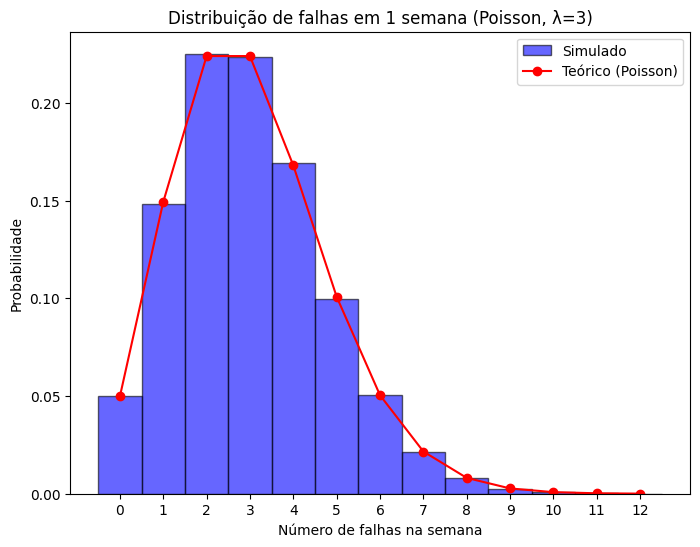

In [13]:
# Exercício 4

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

lambda1 = 3          # Número médio de requisições (taxa Poisson) [falhas/minuto]
N = 100000           # Número de amostras
value = 3            # Queremos a probabilidade de X >= 3
count = 0            # Contador para contar quantas vezes X >= 3
av = np.array([])    # Vetor para armazenar os valores gerados de X
x = np.random.uniform(0, 1, N) # Gera N valores uniformes no intervalo [0,1]

# Loop para gerar os valores de X usando o método de inversão da CDF da Poisson
for ix in x:
    i = 0
    pr = np.exp(-lambda1)  # Probabilidade de X=0 calculada por exp(-lambda), pois (lambda^0)/0! = 1
    F = pr                 # Inicializa a soma cumulativa da CDF com a probabilidade de X=0

    # Método de inversão
    while ix >= F: # mantém somando as probabilidades até que a soma cumulativa seja maior que o valor ix
        pr = (lambda1 / (i + 1)) * pr # Calcula a probabilidade de p(X = i+1) usando a fórmula de recorrência da Poisson
        F += pr # Atualiza a soma cumulativa
        i += 1  # Incrementa o valor de i, que representa o valor de X gerado

    av = np.append(av, i) # 'i' é o valor de X gerado

# Conta quantos valores foram >= value (>= 3)
for expvalue in av:
    if expvalue >= value:
        count += 1

# Calcula a probabilidade de X >= 3 dividindo o número de vezes que X >= 3 ocorreu pelo número total de amostras
prob = count / N

# Calculo da probabilidade de maneira analitica
prob_analitica = 0          # Inicializa a variável para a soma das probabilidades
for x in range(value):  # Para X = 0, 1, 2, 3
    fatorial = 1  # Inicializa o fatorial
    for i in range(1, x + 1):  # Calcula o fatorial de X
        fatorial *= i  # Multiplica o fatorial pelo valor atual de i
    prob_analitica += (lambda1**x) * np.exp(-lambda1) / fatorial # Soma a probabilidade de X = x


# Exibe o resultado
print(f"Probabilidade de X >= 3 (simulada) = {prob:.4f}")
print("Probabilidade analítica", 1 - prob_analitica) # queremos P[x>=3] = 1 - P[x<=3]

# Histograma dos valores simulados
plt.figure(figsize=(8,6))
bins = np.arange(0, np.max(av) + 1.5) - 0.5
plt.hist(av, bins=bins, density=True, alpha=0.6, color='b', edgecolor='black', label="Simulado")

# Valores teóricos da distribuição de Poisson
x_teorico = np.arange(0, np.max(av) + 1)
poisson_teorico = stats.poisson.pmf(x_teorico, lambda1)
plt.plot(x_teorico, poisson_teorico, 'ro-', markersize=6, label="Teórico (Poisson)")
plt.title('Distribuição de falhas em 1 semana (Poisson, λ=3)')
plt.xlabel('Número de falhas na semana')
plt.ylabel('Probabilidade')
plt.xticks(x_teorico)
plt.legend()
plt.show()

